In [1]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

# Load CSV
df = pd.read_csv('Foodpanda Analysis Dataset.csv')

# Quick overview
print(df.head())
print(df.info())  # check columns and nulls
print(df.describe())  # summary stats


  customer_id  gender     age      city signup_date order_id order_date  \
0       C5663    Male   Adult  Peshawar   1/14/2024    O9663  8/23/2023   
1       C2831    Male   Adult    Multan    7/7/2024    O6831  8/23/2023   
2       C2851   Other  Senior    Multan   6/20/2025    O6851  8/23/2023   
3       C1694  Female  Senior  Peshawar    9/5/2023    O5694  8/23/2023   
4       C4339   Other  Senior    Lahore  12/29/2023    O8339  8/24/2023   

  restaurant_name dish_name category  quantity    price payment_method  \
0      McDonald's    Burger  Italian         5  1478.27           Cash   
1             KFC    Burger  Italian         3   956.04         Wallet   
2       Pizza Hut     Fries  Italian         2   882.51           Cash   
3          Subway     Pizza  Dessert         4   231.30           Card   
4             KFC  Sandwich  Dessert         1  1156.69           Cash   

   order_frequency last_order_date  loyalty_points   churned  rating  \
0               38       7/19/20

In [5]:
# Drop rows missing critical info
df = df.dropna(subset=['order_id', 'customer_id', 'price', 'quantity'])

# Fill optional missing columns
df['loyalty_points'] = df['loyalty_points'].fillna(0)
df['rating'] = df['rating'].fillna(0)
df['city'] = df['city'].fillna('Unknown')


In [6]:
df['revenue'] = df['price'] * df['quantity']

In [7]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_order_date'] = pd.to_datetime(df['last_order_date'])

In [8]:
df['month'] = df['order_date'].dt.month
df['day_of_week'] = df['order_date'].dt.day_name()

In [9]:
monthly_revenue = df.groupby('month')['revenue'].sum()
print(monthly_revenue)

month
1     1316367.84
2     1096789.49
3     1242202.54
4     1150665.61
5     1081804.88
6     1165858.68
7     1139259.36
8     1178180.41
9     1297489.08
10    1255389.69
11    1156940.27
12    1262964.23
Name: revenue, dtype: float64


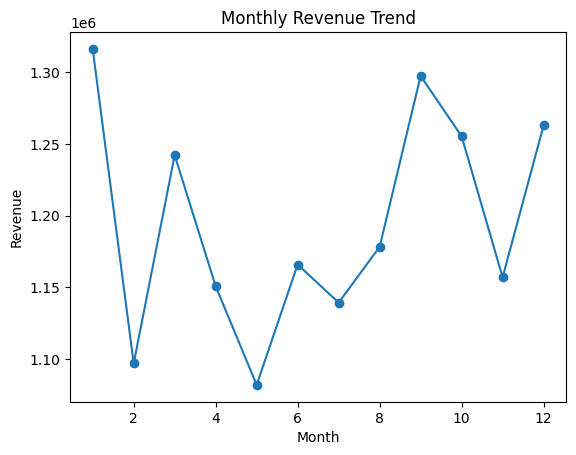

In [10]:
import matplotlib.pyplot as plt

monthly_revenue.plot(kind='line', marker='o', title='Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

city
Multan       3052313.80
Lahore       2916372.35
Peshawar     2906686.38
Islamabad    2835310.27
Karachi      2633229.28
Name: revenue, dtype: float64


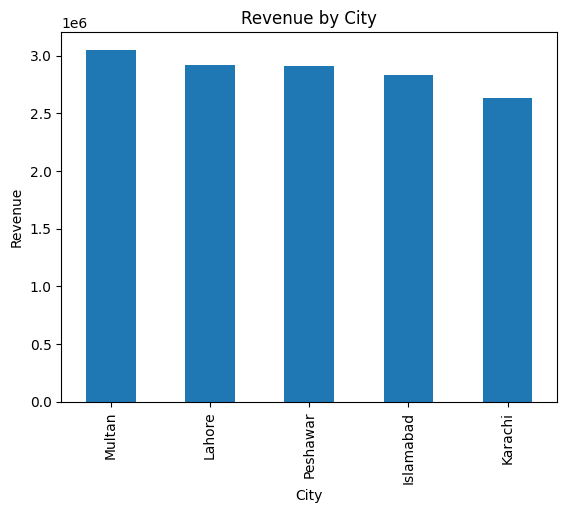

In [14]:
city_revenue = df.groupby('city')['revenue'].sum().sort_values(ascending=False)
print(city_revenue)

city_revenue.plot(kind='bar', title='Revenue by City')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.show()

restaurant_name
Pizza Hut      3002380.59
Subway         2998014.27
KFC            2954233.45
Burger King    2752780.87
McDonald's     2636502.90
Name: revenue, dtype: float64


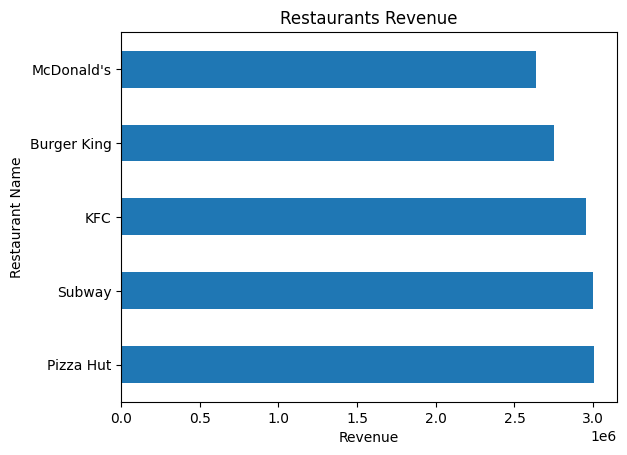

In [12]:
top_restaurants = df.groupby('restaurant_name')['revenue'].sum().sort_values(ascending=False).head(10)
print(top_restaurants)

top_restaurants.plot(kind='barh', title='Restaurants Revenue')
plt.xlabel('Revenue')
plt.ylabel('Restaurant Name')
plt.show()

In [10]:
orders_per_customer = df.groupby('customer_id')['order_id'].count()
print(orders_per_customer.describe())

count    6000.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: order_id, dtype: float64


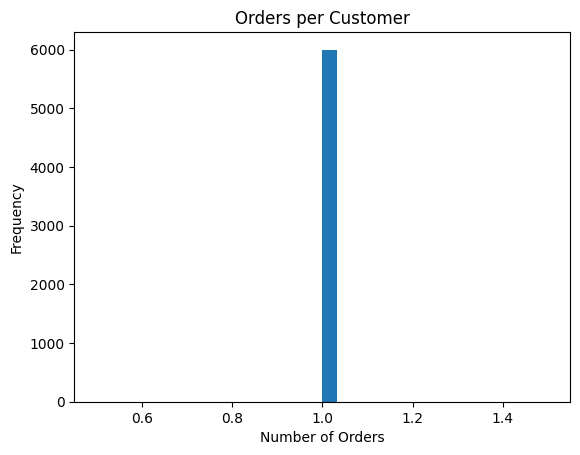

In [11]:
orders_per_customer.plot(kind='hist', bins=30, title='Orders per Customer')
plt.xlabel('Number of Orders')
plt.show()

day_of_week
Monday       2134138.23
Tuesday      1908723.39
Wednesday    1934454.00
Thursday     2173756.69
Friday       2055546.94
Saturday     2029613.53
Sunday       2107679.30
Name: revenue, dtype: float64


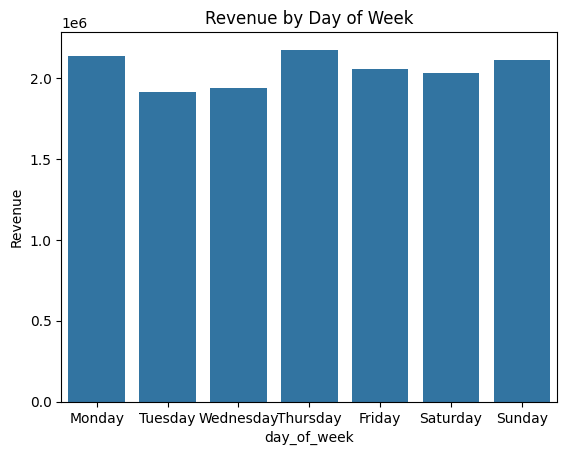

In [12]:
day_revenue = df.groupby('day_of_week')['revenue'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
print(day_revenue)

import seaborn as sns
sns.barplot(x=day_revenue.index, y=day_revenue.values)
plt.title('Revenue by Day of Week')
plt.ylabel('Revenue')
plt.show()

churned
Active      7271237.07
Inactive    7072675.01
Name: revenue, dtype: float64


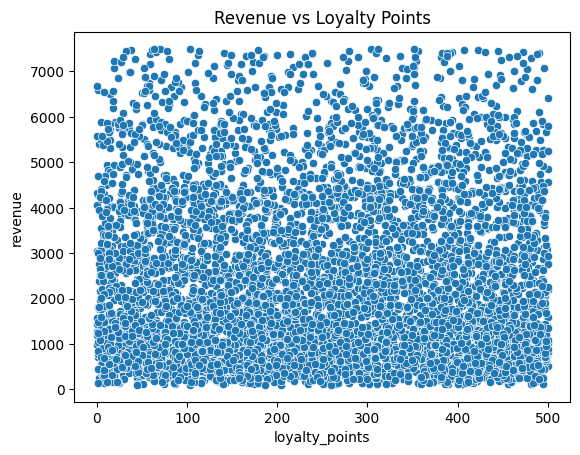

In [13]:
# Revenue by churned status
churn_revenue = df.groupby('churned')['revenue'].sum()
print(churn_revenue)

# Loyalty points vs revenue
sns.scatterplot(x='loyalty_points', y='revenue', data=df)
plt.title('Revenue vs Loyalty Points')
plt.show()

In [14]:
aov = df['revenue'].mean()
print(f"Average Order Value: {aov:.2f}")


Average Order Value: 2390.65


In [15]:
category_revenue = df.groupby('category')['revenue'].sum().sort_values(ascending=False)
print(category_revenue)


category
Italian        3006032.50
Continental    2928524.26
Chinese        2889236.97
Fast Food      2870929.69
Dessert        2649188.66
Name: revenue, dtype: float64


In [16]:
df.to_csv('Foodpanda_Cleaned.csv', index=False)
print("\nCleaned dataset saved as 'Foodpanda_Cleaned.csv'")


Cleaned dataset saved as 'Foodpanda_Cleaned.csv'


In [15]:
df['restaurant_name'].nunique()

5